### 의사결정나무: DT
- if - else방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘
- feature(특성) 중에서 선택한 기준으로 데이터 분할
    * 엔트로피(불순도) ⇒ 낮아지는 방향
    * 정보 이득: 1 - 엔트로피 ⇒ 높아지는 방향
    * 지니 계수: 불평등수치값 ⇒ 낮아지는 방향
- 단점 : 과대적합 가능성 높음, 성능 좋지 못함
        ⇒약분류기
- 장점 ; 전처리의 영향을 받지 않음, 직관성 높음, feature중 주요 feature 확인 가능
- 주의 : 
    - 여기서의 주요 feature는 데이터 분할을 위한 주요 feature
    - 100 % 데이터의 주요 feature가 아닐 가능성 있음 ⇒ 다른 검사(상관계수, 시각화 등)와 함께 평가 

1. 모듈 로딩 및 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris = pd.read_csv('../data/iris.csv')

2. 학습용 데이터셋 준비

In [3]:
# 2 - 1. feature, target 분리
feature = iris[iris.columns[:3]]
target = iris[iris.columns[4]]

In [4]:
#2 - 2. 훈련용 / 테스트용 데이터셋 분리

from sklearn.model_selection import train_test_split

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.2, stratify= target)

3. 기계학습 진행
- 타겟 데이터 확인 결과 : 3개 분류
- 학습유형 ; 지도학습 + 분류
    - 알고리즘 : KNN, LogisticRegression, SVM - SVC, DecisionTree

3 - 1. 의사 결정 알고리즘으로 분류하기

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
md = DecisionTreeClassifier()
md.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [8]:
# 생성된 모델구조 시각화
from sklearn.tree import export_graphviz

In [9]:
export_graphviz(md, 'iris_dt_md.txt')
export_graphviz(md, 'iris_dt_md.dot')

In [19]:
# DT모델의 시각화 정보를 dot언어로 작성해서 파일로 저장ㅎ가ㅣ
print(export_graphviz(md, 'iris_dt_md'))
print(export_graphviz(md, 'iris_dt_md.dot', feature_names = md.classes_, filled=True))

None
None


In [17]:
import graphviz as gz



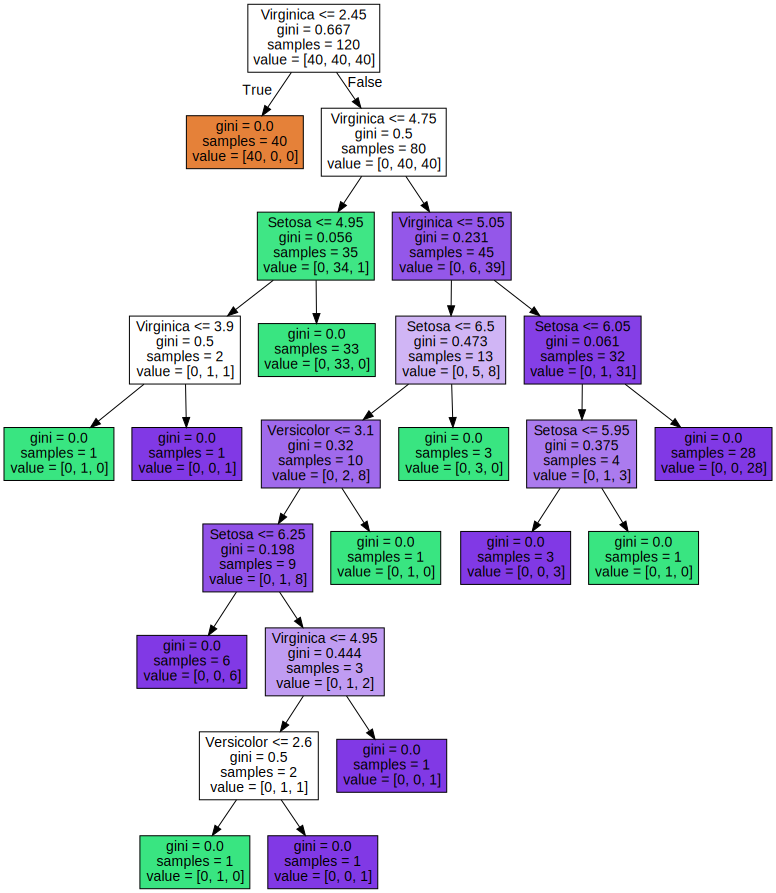

In [18]:
gz.Source.from_file('iris_dt_md.dot')

4. 평가


In [22]:
md.score(xtest, ytest) #-> overfitting

1.0

In [23]:
md.score(xtrain,ytrain)

1.0

5. 문제 해결 및 성능 향상: 튜닝
- 원인 예상 : 
    * 데이터 부족 - crossvalidation
    * DT 하이퍼파라미터 기본값으로 만 사용 - 다양한 값 조절
- 2개의 원인을 한번에 해결하기 위해 GridSearchCV 사용
    

In [24]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
# condition
# cv; default 5, 
# DT hp : max_depth, gini, ... 
dtmd = DecisionTreeClassifier()
n_cv = 5
params = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 10, 15], 'min_samples_split': [2,4,6]}

# 하이퍼파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습 진행해주는 인스턴스
gs = GridSearchCV(dtmd, param_grid=params, cv=n_cv)

In [27]:
# 조합된 모델들의 학습 진행
result = gs.fit(xtrain, ytrain)

In [28]:
# 결과 확인

result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6]})

In [32]:
# 학습 후 저장된 모델 파라미터 확인
# 교차학습 결과 ⇒ 조합된 모델 갯수만큼
cvresult = pd.DataFrame(gs.cv_results_)

In [33]:
cvresult

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002632,4.816207e-04,0.001998,0.000503,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.916667,0.875000,0.875,0.958333,0.958333,0.916667,0.037268,10
1,0.001685,8.442343e-04,0.001098,0.000640,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.916667,0.875000,0.875,0.958333,0.958333,0.916667,0.037268,10
2,0.001386,5.009083e-04,0.001001,0.000009,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.916667,0.916667,0.875,0.958333,0.958333,0.925000,0.031180,7
3,0.001401,4.933916e-04,0.000999,0.000008,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.875000,0.875000,0.875,0.875000,0.958333,0.891667,0.033333,24
4,0.001203,4.057841e-04,0.000799,0.000399,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.875000,0.875000,0.875,0.875000,0.958333,0.891667,0.033333,24
5,0.001108,2.157473e-04,0.000801,0.000401,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.916667,0.916667,0.875,0.958333,0.958333,0.925000,0.031180,7
6,0.001000,6.646706e-06,0.001000,0.000006,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.875000,0.875000,0.875,0.875000,0.958333,0.891667,0.033333,24
7,0.001198,4.012985e-04,0.000800,0.000400,gini,15,4,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.875000,0.875000,0.875,0.875000,0.958333,0.891667,0.033333,24
8,0.001000,4.101908e-07,0.000600,0.000490,gini,15,6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.916667,0.916667,0.875,0.958333,0.958333,0.925000,0.031180,7
9,0.001184,4.077941e-04,0.000401,0.000491,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.916667,0.958333,0.875,0.958333,0.958333,0.933333,0.033333,1


In [37]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터

gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [38]:
# 조합된 모델 중 최고의 점수
gs.best_score_

0.9333333333333333

In [45]:
# 조합된 모델 중 최고의 성능을 내는 모델 인스턴스

bestmodel = gs.best_estimator_

6. 학습 및 튜닝 이후 모델 저장
<hr>

- 다른 파일에서 활용 가능한 파일 형태로 저장
- 웹 / 앱 등 원하는 곳에서 활용 가능
- sklearn에서는 pickle 포맷으로 저장
- joblib 모듈에 포함됨

In [46]:
import joblib
import os

In [49]:
# 모델 저장
md_filename = 'iris_dt.pkl'
md_dir = '../model/'
# 저장폴더 존재여부 확인 후 저장하기
if not os.path.exists(md_dir):
    os.mkdir(md_dir)


In [50]:
joblib.dump(bestmodel, md_filename)

['iris_dt.pkl']